# P4W2: Evaluatiemetrieken

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from plot_roc import plot_roc

In [82]:
def trueFalse (confusion_matrix, columnnb=0):
    TP = confusion_matrix.iloc[columnnb][columnnb]
    print('TP', TP)
    TN = np.diag(confusion_matrix).sum() - TP
    print('TN:', TN)
    FP = confusion_matrix.iloc[:, columnnb].sum() - TP
    print('FP:', FP)
    FN = confusion_matrix.iloc[columnnb,:].sum() - TP
    print('FN:', FN)
    return

def accuracy(confusion_matrix):
    return np.diag(confusion_matrix).sum()/confusion_matrix.sum().sum()

def precision(confusion_matrix):
    precision = []
    n = confusion_matrix.shape[1]
    for i in range(0,n):
        TP = confusion_matrix.iloc[i][i]
        precision = precision + [TP/confusion_matrix.iloc[:, i].sum()]
    return precision

def recall(confusion_matrix):
    recall = []
    n = confusion_matrix.shape[0]
    for i in range(0,n):
        TP = confusion_matrix.iloc[i][i]
        recall = recall + [TP/confusion_matrix.iloc[i, :].sum()]
    return recall

def f_measure(confusion_matrix, beta):
    precisionarray = precision(confusion_matrix)
    recallarray = recall(confusion_matrix)
    fmeasure=[]
    n = len(precisionarray)
    for i in range(0,n):
        p = precisionarray[i]
        r = recallarray [i]
        fmeasure = fmeasure + [((beta*beta+1)*p*r)/(beta*beta*p+r)]
    return fmeasure

def overview_metrieken(confusion_matrix, beta):
    overview_1 = np.transpose(precision (confusion_matrix))
    overview_2 = np.transpose(recall(confusion_matrix))
    overview_3 = np.transpose(f_measure(confusion_matrix,beta))
    overview_table=pd.DataFrame (data=np.array([overview_1, overview_2, overview_3]), columns=confusion_matrix.index)
    overview_table.index = ['precision', 'recall', 'fx']
    return[overview_table]

def positiverates(confusion_matrix):
    if (confusion_matrix.shape[0] == 2) & (confusion_matrix.shape[1] == 2):
        TPR = confusion_matrix.iloc[0][0]/confusion_matrix.iloc[0, :].sum()
        print('TPR', TPR)
        FPR = confusion_matrix.iloc[1][0]/confusion_matrix.iloc[1, :].sum()
        print('FPR', FPR)
    return

## Vraag 1

In [83]:
data = pd.DataFrame({'Predict YES ' : [100,10],'predict NO' :[5,50]}, index=['actual YES','Actual NO'])
data

,Predict YES,predict NO
actual YES,100,5
Actual NO,10,50


In [84]:
trueFalse(data)
print(accuracy(data))
print(precision(data))
print(recall(data))
print(overview_metrieken(data,1))
print(overview_metrieken(data,1.5))



TP 100
TN: 50
FP: 10
FN: 5
0.9090909090909091
[0.9090909090909091, 0.9090909090909091]
[0.9523809523809523, 0.8333333333333334]
[           actual YES  Actual NO
precision    0.909091   0.909091
recall       0.952381   0.833333
fx           0.930233   0.869565]
[           actual YES  Actual NO
precision    0.909091   0.909091
recall       0.952381   0.833333
fx           0.938628   0.855263]


C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = confusion_matrix.iloc[columnnb][columnnb]
C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = confusion_matrix.iloc[i][i]
C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = confusion_

In [85]:
positiverates(data)

TPR 0.9523809523809523
FPR 0.16666666666666666


C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TPR = confusion_matrix.iloc[0][0]/confusion_matrix.iloc[0, :].sum()
C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  FPR = confusion_matrix.iloc[1][0]/confusion_matrix.iloc[1, :].sum()


## Vraag 2

In [86]:
data2 = pd.DataFrame({'Predict A ' : [100,50],'predict B' :[0,5]}, index=['actual A','Actual B'])
data2
print(accuracy(data2))
print(overview_metrieken(data2,1))

0.6774193548387096
[           actual A  Actual B
precision  0.666667  1.000000
recall     1.000000  0.090909
fx         0.800000  0.166667]


C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = confusion_matrix.iloc[i][i]
C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = confusion_matrix.iloc[i][i]


## Vraag 3

In [87]:
data3 = pd.DataFrame({"Voorspeld asfalt" : [2385, 4, 0, 1, 4] , "Voorspeld Beton" : [0, 332, 0, 0, 1], "Voorspeld Gras":[0, 1, 908, 8, 0], "Voorspeld Boom":[0, 0, 0, 1084, 9], "Voorspeld Gebouwd":[12, 0, 0, 6, 2053]})
trueFalse(data3, 2)

TP 908
TN: 5854
FP: 9
FN: 0


C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = confusion_matrix.iloc[columnnb][columnnb]


In [88]:
print(accuracy(data3))
print(overview_metrieken(data3,1))

C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = confusion_matrix.iloc[i][i]
C:\Users\robbe\AppData\Local\Temp\ipykernel_18488\1420185845.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = confusion_matrix.iloc[i][i]


0.9932432432432432
[                  0         1         2         3         4
precision  0.996241  0.996997  0.990185  0.991766  0.991309
recall     0.994994  0.985163  1.000000  0.986351  0.993227
fx         0.995617  0.991045  0.995068  0.989051  0.992267]


## Vraag 4

## Vraag 5

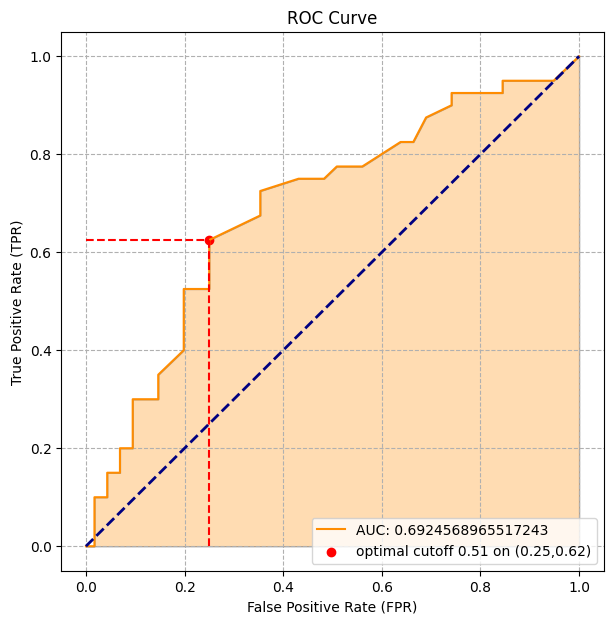

In [89]:
edu1 = pd.read_csv("../DataSets/education_roc1.csv")
edu2 = pd.read_csv("../DataSets/education_roc2.csv")
edu1
edu2
mapping_dict = {'6-11yrs': 1, '12+ yrs': 0}
edu1['y_true'] = edu1['y_true'].map(mapping_dict)
edu1

# make it so if it says
plot_roc(edu1['y_true'], edu1['6-11yrs'])
# treshold = 0.51


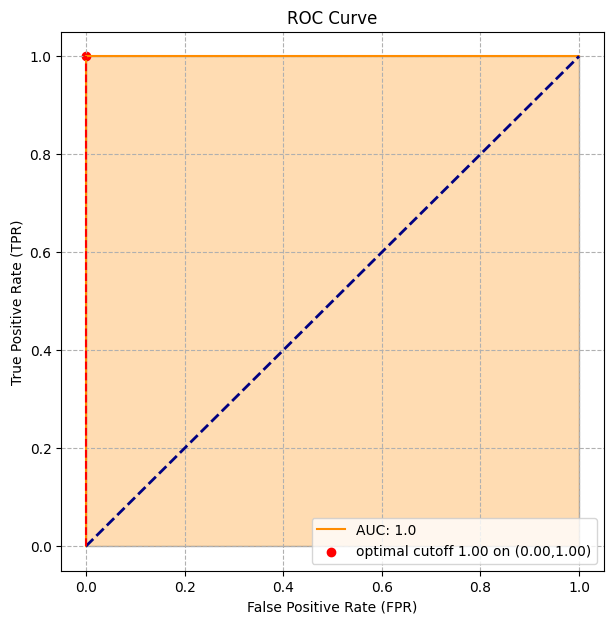

In [90]:
mapping_dict = {'6-11yrs': 1, '12+ yrs': 0}
edu2['y_true'] = edu2['y_true'].map(mapping_dict)
plot_roc(edu2['y_true'], edu2['6-11yrs'])
#treshold = 1

In [91]:
iris = pd.read_csv("../DataSets/iris.csv")
x=[iris['petal length'],iris['petal width'],iris['sepal length'],iris['sepal width']]
y= iris['target']
model = LinearDiscriminantAnalysis()
model.fit(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [4, 150]